In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['enrollee_id' 'city' 'city_development_index' 'gender'
 'relevent_experience' 'enrolled_university' 'education_level'
 'major_discipline' 'experience' 'company_size' 'company_type'
 'last_new_job' 'training_hours' 'target']


In [4]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
train_df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
18354,25366,city_103,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.939,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0
18358,5995,city_105,0.794,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,2,84,0


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
enrollee

In [7]:
train_df.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
train_df.describe(include=['O'])

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18359,14261,18359,18017,17902,15521,18300,13580,13320,17992
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4358,12884,13596,13659,10769,13738,3437,3120,10051,7567


In [9]:
z = train_df['city'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['city'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,city_171,city_2,city_120,city_18,city_79,city_31,city_109,city_25,city_82,city_140
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,0,0,0,0,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,0,0,0,0,0,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,0,0,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,0,0,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,0,0,0,0


In [10]:
z = train_df['gender'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['gender'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,city_18,city_79,city_31,city_109,city_25,city_82,city_140,Male,Female,Other
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,0,0,0,0,0,1,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,0,0,0,0,0,1,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,0,0,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,0,0,0,1,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
z = train_df['relevent_experience'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['relevent_experience'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,city_31,city_109,city_25,city_82,city_140,Male,Female,Other,Has relevent experience,No relevent experience
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,0,0,0,1,0,0,1,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,0,0,0,1,0,0,1,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,0,0,0,0,1,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,0,1,0,0,1,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,0,0,0,1


In [12]:
z = train_df['enrolled_university'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['enrolled_university'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,city_82,city_140,Male,Female,Other,Has relevent experience,No relevent experience,no_enrollment,Full time course,Part time course
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,1,0,0,1,0,1,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,1,0,0,1,0,1,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,0,1,0,1,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,1,0,0,1,0,1,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,1,1,0,0


In [13]:
z = train_df['education_level'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['education_level'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,Has relevent experience,No relevent experience,no_enrollment,Full time course,Part time course,Graduate,Masters,High School,Phd,Primary School
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,1,0,1,0,0,1,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,1,0,1,0,0,1,0,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,1,0,1,0,0,1,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,1,0,1,0,0,1,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,1,1,0,0,0,1,0,0,0


In [14]:
z = train_df['major_discipline'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['major_discipline'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,Graduate,Masters,High School,Phd,Primary School,STEM,No Major,Business Degree,Arts,Humanities
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,1,0,0,0,0,1,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,1,0,0,0,0,1,0,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,1,0,0,0,0,1,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,1,0,0,0,0,1,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,1,0,0,0,1,0,0,0,0


In [15]:
z = train_df['experience'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset['exp' + ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['experience'] == ci, 'exp' + ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,exp11,exp12,exp7,exp2,exp13,exp<1,exp19,exp18,exp17,exp20
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,0,0,0,0,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,0,0,0,0,0,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,0,0,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,0,0,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,0,0,0,0


In [16]:
z = train_df['company_size'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset['size' + ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['company_size'] == ci, 'size' + ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,exp17,exp20,size100-500,size<10,size50-99,size5000-9999,size10000+,size1000-4999,size500-999,size10/49
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,1,0,0,0,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,0,1,0,0,0,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,1,0,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,1,0,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,0,0,0,0


In [17]:
z = train_df['company_type'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset[ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['company_type'] == ci, ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,size5000-9999,size10000+,size1000-4999,size500-999,size10/49,Pvt Ltd,Funded Startup,Public Sector,Early Stage Startup,NGO
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,0,0,0,1,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,0,0,0,0,0,0,1,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,0,0,0,0,0,0,1,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,0,1,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,0,0,0,0,0


In [18]:
z = train_df['last_new_job'].unique().tolist()
x = [y for y in z if str(y) != 'nan']
for dataset in combine:
    for ci in x:
        dataset['last' + ci] = 0
for dataset in combine:
    for ci in x:
        dataset.loc[ dataset['last_new_job'] == ci, 'last' + ci] = 1
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,Funded Startup,Public Sector,Early Stage Startup,NGO,last1,last2,last3,last>4,lastnever,last4
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,...,0,0,0,0,1,0,0,0,0,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,...,1,0,0,0,1,0,0,0,0,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,...,0,1,0,0,0,1,0,0,0,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,...,0,0,0,0,1,0,0,0,0,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,...,0,0,0,0,0,1,0,0,0,0


In [19]:
ma = max(np.max(combine[0]['city_development_index']), np.max(combine[1]['city_development_index']))
mi = max(np.min(combine[0]['city_development_index']), np.min(combine[1]['city_development_index']))
for dataset in combine:
    dataset['city_development_index'] = (dataset['city_development_index'] - mi) / (ma - mi)
    print(np.max(dataset['city_development_index']), np.min(dataset['city_development_index']))

1.0 0.0
1.0 0.0


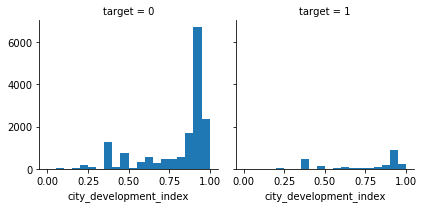

In [20]:
g = sns.FacetGrid(train_df, col='target')
g.map(plt.hist, 'city_development_index', bins=20)

In [21]:
ma = max(np.max(combine[0]['training_hours']), np.max(combine[1]['training_hours']))
mi = max(np.min(combine[0]['training_hours']), np.min(combine[1]['training_hours']))
for dataset in combine:
    dataset['training_hours'] = (dataset['training_hours'] - mi) / (ma - mi)
    print(np.max(dataset['training_hours']), np.min(dataset['training_hours']))

1.0 0.0
1.0 0.0


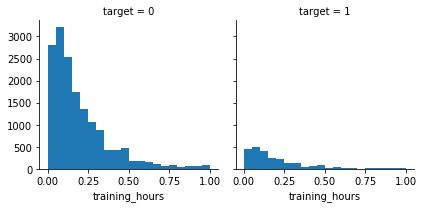

In [22]:
g = sns.FacetGrid(train_df, col='target')
g.map(plt.hist, 'training_hours', bins=20)

In [23]:
train_df = train_df.drop(['enrollee_id', 'city', 'gender',
 'relevent_experience', 'enrolled_university', 'education_level',
 'major_discipline', 'experience', 'company_size', 'company_type',
 'last_new_job'], axis=1)
test_df = test_df.drop(['city', 'gender',
 'relevent_experience', 'enrolled_university', 'education_level',
 'major_discipline', 'experience', 'company_size', 'company_type',
 'last_new_job'], axis=1)

In [24]:
test_df.head()

,enrollee_id,city_development_index,training_hours,city_149,city_83,city_16,city_64,city_100,city_21,city_114,...,Funded Startup,Public Sector,Early Stage Startup,NGO,last1,last2,last3,last>4,lastnever,last4
0,16548,0.000000,0.041791,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,12036,0.980040,0.277612,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,11061,0.942116,0.047761,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,5032,0.950100,0.223881,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,17599,0.762475,0.191045,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
train_df.head()

,city_development_index,training_hours,target,city_149,city_83,city_16,city_64,city_100,city_21,city_114,...,Funded Startup,Public Sector,Early Stage Startup,NGO,last1,last2,last3,last>4,lastnever,last4
0,0.481038,0.313433,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.948104,0.202985,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.922156,0.008955,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0.435130,0.074627,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.876248,0.259701,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
X_train = train_df.drop("target", axis=1)
Y_train = train_df["target"]
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((18359, 184), (18359,), (15021, 185))

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import callbacks
from keras import optimizers
#Y_train = np_utils.to_categorical(Y_train)

InputDimension = 184
print(Y_train.shape )

model = Sequential()
model.add(Dense(256, input_dim=InputDimension, activation='softplus'))
model.add(Dense(512, activation='softplus'))
model.add(Dense(512, activation='softplus'))
model.add(Dense(512, activation='softplus'))

model.add(Dense(1, activation='relu'))


earlystopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='min')
optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1000, batch_size=200, validation_split=0.2, verbose=1, callbacks=[earlystopping])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [28]:
from sklearn.decomposition import PCA


id = X_test['enrollee_id']
X_test.drop(['enrollee_id'], inplace = True, axis = 1 )

X_test.fillna( X_test.median() ,inplace = True)
n_components = 7
x_train_red = PCA(n_components=n_components).fit_transform(X_train)
X_test_red = PCA(n_components=n_components).fit_transform(X_test)

from sklearn.svm import SVC

clf_SVC = SVC(C=1000.0, kernel='poly', degree=   3 , gamma='auto', coef0=0.0, shrinking=True, 
          probability=False, tol=0.001, cache_size=200, class_weight=None, 
          verbose=0, max_iter=-1, decision_function_shape="ovr", random_state = 0)
# clf_SVC.fit( x_train_red ,y_train)

# print('Accuracy of SVC on training set: {:.2f}'.format(clf_SVC.score(x_train_red, y_train) * 100))

In [29]:
X_test_red

array([[ 1.40086253, -0.70967295,  0.41358984, ..., -0.65597664,
         0.36428261,  0.23547577],
       [ 0.06632628, -0.47598037,  0.06178406, ...,  0.35524089,
        -0.29391345,  0.89721575],
       [ 1.1954646 , -1.04664947,  0.04836306, ..., -0.33359563,
        -0.5035961 ,  0.86425846],
       ...,
       [-0.09183151,  0.77766646,  0.05878771, ...,  0.98272203,
        -0.24178667, -0.69856746],
       [ 1.3813717 , -1.09271678, -0.29655505, ..., -0.43094779,
         0.30328893,  0.41742632],
       [ 0.9902312 , -0.21473102,  0.54664285, ..., -0.07358472,
        -0.08554411, -0.12385695]])

In [30]:
X_test = X_test/ X_test.max()

In [31]:
predictions = model.predict(X_test)

NameError: name 'model' is not defined

In [ ]:
# print(predictions)
predictions = np.rint(predictions)
print(predictions )

In [ ]:
# survive = pd.DataFrame(data={'Survived':predictions } )
target = pd.DataFrame.from_records(predictions, columns = ["target"])
target.reset_index(drop=True, inplace=True)
id.reset_index(drop=True, inplace=True)
output = pd.concat([id, target], axis=1, sort=False)
output = output.astype(np.int32)
output.to_csv('nsub2.csv', index = False)
output.head(10)